In [3]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные датасета для «Прогноза популярности статьи на Хабре».

In [4]:
df = pd.read_csv('howpop_train.csv')

In [5]:
df.shape

(134137, 17)

In [6]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm`. Выберем их с помощью `filter()` и удалим drop-ом:

In [7]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [9]:
df.describe(include = ['object', 'bool']).T # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/250671/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [10]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец published (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу datetime:

In [11]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


In [12]:
df.head(50).T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/,https://habrahabr.ru/post/18295/,https://geektimes.ru/post/18306/,https://habrahabr.ru/post/18311/,https://habrahabr.ru/post/31352/,https://habrahabr.ru/post/18314/,...,https://habrahabr.ru/post/18401/,https://habrahabr.ru/post/18402/,https://geektimes.ru/post/18404/,https://habrahabr.ru/post/18407/,https://habrahabr.ru/post/18408/,https://geektimes.ru/post/18409/,https://habrahabr.ru/post/18410/,https://geektimes.ru/post/18412/,https://habrahabr.ru/post/18413/,https://habrahabr.ru/post/18416/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru,habrahabr.ru,geektimes.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,...,habrahabr.ru,habrahabr.ru,geektimes.ru,habrahabr.ru,habrahabr.ru,geektimes.ru,habrahabr.ru,geektimes.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286,18291,18294,18295,18306,18311,31352,18314,...,18401,18402,18404,18407,18408,18409,18410,18412,18413,18416
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00,2008-01-02 16:14:00,2008-01-03 12:55:00,2008-01-03 17:20:00,2008-01-03 22:54:00,2008-01-03 23:56:00,...,2008-01-07 12:04:00,2008-01-07 13:27:00,2008-01-07 15:15:00,2008-01-07 15:25:00,2008-01-07 17:22:00,2008-01-07 17:49:00,2008-01-07 18:18:00,2008-01-07 18:53:00,2008-01-07 19:13:00,2008-01-07 20:10:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo,@lvea,@abbasov,@Andrey,@kvladimir,@lvea,...,@suckdontbite,@vladon,@lvader,@VVBash,@cyboru,@agl666,@Klaus,@MrTwister,@Chemist,@Disaview
flow,develop,design,design,design,NaN,develop,NaN,misc,develop,develop,...,develop,develop,NaN,admin,develop,NaN,misc,NaN,misc,misc
polling,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
content_len,4305,7344,8431,5662,3706,3171,435,3291,1953,3712,...,461,2449,645,1526,789,2843,2927,783,2551,1275
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone,Mobile2.0 Всеобщая доступность,Modbook в действии,В чем суть проекта Vladelia.ru,Подтверждено: Wikia Search запускается в понед...,Mobile 2.0 Выбор предпочтительного способа связи,...,Генератор favicons,Wikia Search — первые впечатления,Engdadget опубликовал фотографии и частично сп...,PSPI — запуск фотошопных плагинов под Гимпом!,Краткий справочник по PostgreSQL 8.3,Aimp2 — бесплатный отечественный проигрыватель,BarCamp Baltics 2008,Последний рабочий день Билла Гейтса в Microsof...,Объединяя социальные сети — bestpersons.ru. Но...,Top4top открыт!
comments,0,1,47,102,230,22,10,64,23,6,...,39,32,5,34,3,169,14,68,115,360


Создадим несколько столбцов на основе данных о времени публикации:

In [13]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос. Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но я советую Вам потренироваться строить (красивые) визуализации.

## 1. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

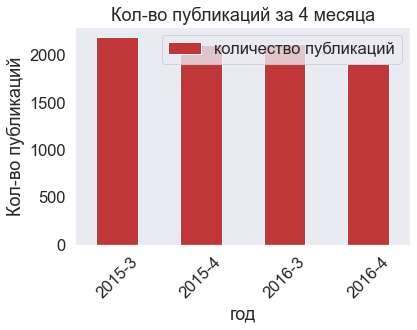

In [14]:
df = df.fillna(0)
lst_year = []
lst_month = []
for year in range(2015,2017):
    for month in range(3,5):
        lst_year.append(f'{year}-{month}')
        lst_month.append(int(df.where((df['year']==year) & (df['month']==month)).dropna().shape[0]))
df__ = pd.DataFrame({'год' : lst_year,'количество публикаций' : lst_month})
df__.groupby('год').sum().plot(kind='bar', rot=45, title = 'Кол-во публикаций за 4 месяца');
plt.ylabel('Кол-во публикаций');

В Марте 2015 года больше всего публикаций

## 2. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре всегда больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр hue; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

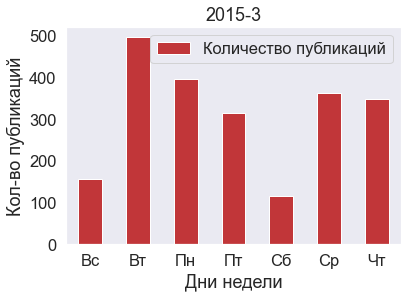

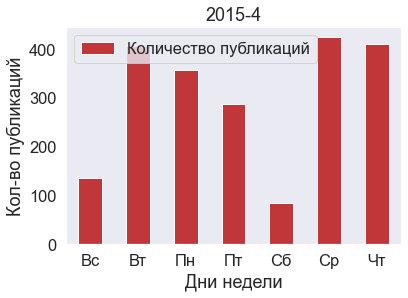

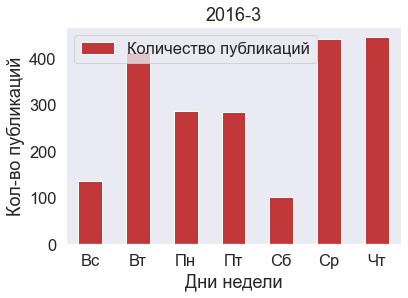

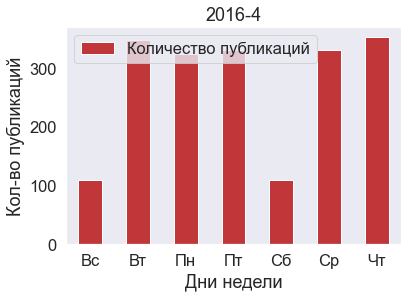

In [43]:
df = df.fillna(0)
lst_year = []
lst_month = []
for year in range(2015,2017):
    for month in range(3,5):
        df_2 = df.where((df['year']==year) & (df['month']==month)).dropna()
        df_3 =pd.DataFrame({'Количество публикаций' : [ df_2.where(df['dayofweek'] == i).dropna().shape[0]  for i in range(1,8)],
                            'Дни недели' : [j for j in ['Пн','Вт','Ср','Чт','Пт','Сб','Вс']]})
        df_3.groupby('Дни недели').sum().plot(kind='bar', rot=0, title = f'{year}-{month}');
        plt.ylabel('Кол-во публикаций');

В марте 2015 года по количеству публикаций выделяется Вторник. 
В апреле 2015 года по количеству публикаций выделяется Вторник, Среда и Четверг. 
В марте 2016 года по количеству публикаций выделяется Вторник, Среда и Четверг. 
В апреле 2016 года по количеству публикаций выделяется Понедельник, Вторник, Среда, Четверг и Пятница.

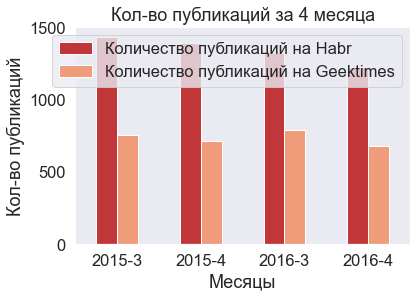

In [93]:
df = df.fillna(0)
lst = []
lst_2 = []
lst_year = []
for year in range(2015,2017):
    for month in range(3,5):
        df_2 = df.where((df['year']==year) & (df['month']==month))
        lst.append(df_2.where(df_2['domain'] == 'habrahabr.ru').dropna().shape[0])
        lst_2.append(df_2.where(df_2['domain'] == 'geektimes.ru').dropna().shape[0])
        lst_year.append(f'{year}-{month}')
df_3 =pd.DataFrame({'Количество публикаций на Habr' : lst,
                        'Количество публикаций на Geektimes' : lst_2,
                        'Месяцы' : lst_year})
df_3.groupby('Месяцы').sum().plot(kind='bar', rot=0, title = 'Кол-во публикаций за 4 месяца')
plt.ylabel('Кол-во публикаций');

На Хабре больше статей чем на Гиктаймс

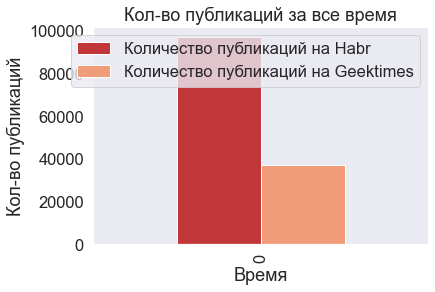

In [92]:
df_5 = df.fillna(0)
df_4 =pd.DataFrame({'Количество публикаций на Habr' : [df.where(df['domain'] == 'habrahabr.ru').dropna().shape[0]],
                    'Количество публикаций на Geektimes' : [df_5.where(df_5['domain'] == 'geektimes.ru').dropna().shape[0]]})
df_4.groupby('Количество публикаций на Geektimes').plot(kind='bar', title = 'Кол-во публикаций за все время');
plt.ylabel('Кол-во публикаций');
plt.xlabel('Время');

На Хабре больше статей чем на Гиктаймс за все время

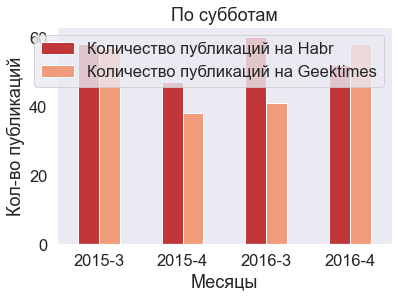

In [63]:
df = df.fillna(0)
lst = []
lst_2 = []
lst_year = []
for year in range(2015,2017):
    for month in range(3,5):
        df_2 = df.where((df['year']==year) & (df['month']==month) & (df['dayofweek'] == 6))
        lst.append(df_2.where(df_2['domain'] == 'habrahabr.ru').dropna().shape[0])
        lst_2.append(df_2.where(df_2['domain'] == 'geektimes.ru').dropna().shape[0])
        lst_year.append(f'{year}-{month}')
df_3 =pd.DataFrame({'Количество публикаций на Habr' : lst,
                        'Количество публикаций на Geektimes' : lst_2,
                        'Месяцы' : lst_year})
df_3.groupby('Месяцы').sum().plot(kind='bar', rot=0,title="По субботам" );
plt.ylabel('Кол-во публикаций');

В марте 2015 статей на хабре было чуть больше. 
В апреле 2015 статей на хабре было больше. 
В марте 2016 статей на хабре было больше. 
В апреле 2016 статей на гиктаймс было больше.

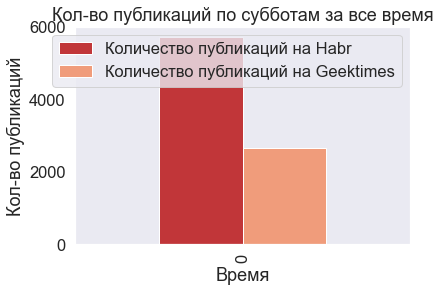

In [91]:
df_5 = df.fillna(0)
df_4 =pd.DataFrame({'Количество публикаций на Habr' : [df.where((df['domain'] == 'habrahabr.ru') & (df['dayofweek'] == 6.0)).dropna().shape[0]],
                    'Количество публикаций на Geektimes' : [df_5.where((df_5['domain'] == 'geektimes.ru') & (df['dayofweek'] == 6.0)).dropna().shape[0]]})

df_4.groupby('Количество публикаций на Geektimes').plot(kind='bar',title="Кол-во публикаций по субботам за все время");
plt.ylabel('Кол-во публикаций');
plt.xlabel('Время');

Количество статей на хабр за все время было больше, чем на гиктайс

## 3. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

In [70]:
filter_1 = df['year']==2015
filter_2 = df['year']==2016
filter_3 = df['month']==4
filter_4 = df['month']==3

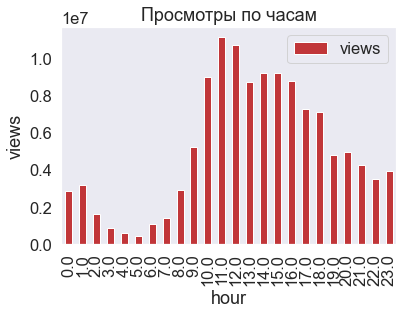

In [74]:
filter_mas = ((filter_1 & filter_3)|(filter_1 & filter_4)|(filter_2 & filter_3)|(filter_2 & filter_4))
df_1 = df.where(filter_mas).dropna()
df_1[['views','hour']].groupby('hour').sum().plot(kind='bar',rot=90,title="Просмотры по часам");
plt.ylabel('views');

Больше всего просмотров набирают статьи опубликованные в 11 часов утра, на втором месте статьи опубликованные в 12 часов дня

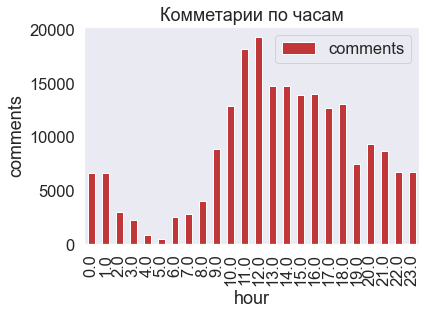

In [75]:
filter_mas = ((filter_1 & filter_3)|(filter_1 & filter_4)|(filter_2 & filter_3)|(filter_2 & filter_4))
df_1 = df.where(filter_mas).dropna()
df_1[['comments','hour']].groupby('hour').sum().plot(kind='bar',rot=90,title="Комметарии по часам");
plt.ylabel('comments');

Больше всего комметариев набирают статьи опубликованные в 12 часов дня

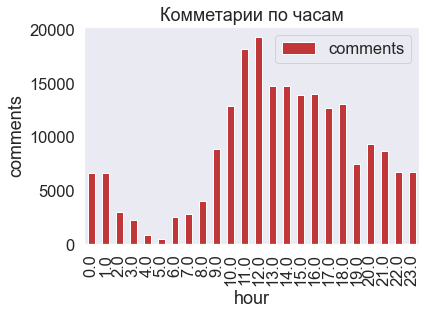

In [76]:
filter_mas = ((filter_1 & filter_3)|(filter_1 & filter_4)|(filter_2 & filter_3)|(filter_2 & filter_4))
df_1 = df.where(filter_mas).dropna()
df_1[['comments','hour']].groupby('hour').sum().plot(kind='bar',rot=90,title="Комметарии по часам");
plt.ylabel('comments');

Больше всего просмотров набирают статьи опубликованные в 11 часов утра

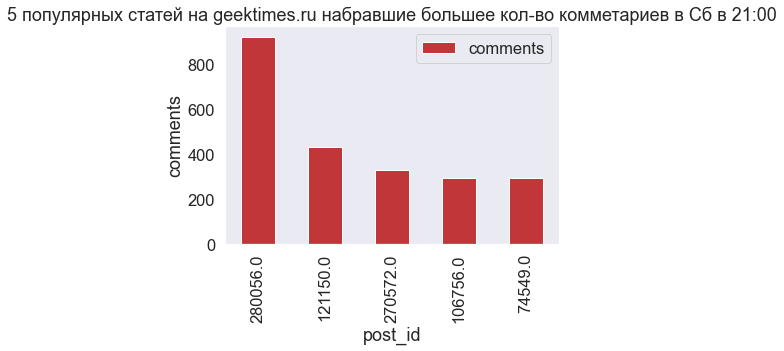

In [79]:
df_5 = df.fillna(0)
filter_8 = df_5['domain'] == 'geektimes.ru'
filter_7 =  df['dayofweek'] == 6.0
filter_9 = df['hour'] == 21.0
df_7 = df_5.where(filter_8 & filter_7 & filter_9).dropna()
df_7 = df_7[['post_id','comments']].sort_values(by='comments',ascending=False)
df_7.set_index('post_id',inplace=True)
df_7.head(5).plot(kind='bar',rot=90,title = '5 популярных статей на geektimes.ru набравшие большее кол-во комметариев в Сб в 21:00');
plt.ylabel('comments');

Статья имеющая ID 280056 набрала большее количество комметарием, чем остальные статьи опубликованные в субботу в 9 часов вечера

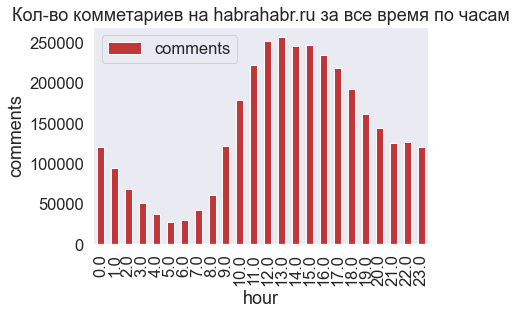

In [83]:
df_9 = df.where(df['domain'] == 'habrahabr.ru').dropna()
df_9[['comments','hour']].groupby('hour').sum().plot(kind='bar',rot=90, title = 'Кол-во комметариев на habrahabr.ru за все время по часам');
plt.ylabel('comments');

На хабр дневные статьи комметрируют чаще, чем остатьи опубликованные в другой промежуток времени

## 4. Кого из топ-20 авторов чаще всего минусуют?¶

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

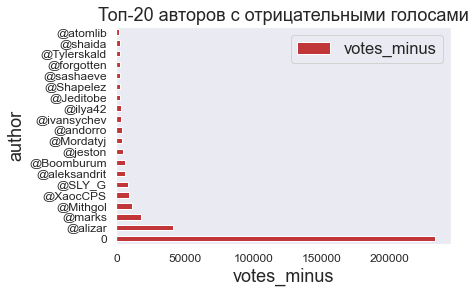

In [22]:
df[['author','votes_minus']].groupby('author').sum().sort_values(by='votes_minus',
                                                                 ascending=False).head(20).plot(kind='barh',
                                                                                                rot=0, 
                                                                                                fontsize = 12,
                                                                                               title = 'Топ-20 авторов с отрицательными голосами');
plt.xlabel('votes_minus');

@ilya42 чаще всего минусуют

## 5. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

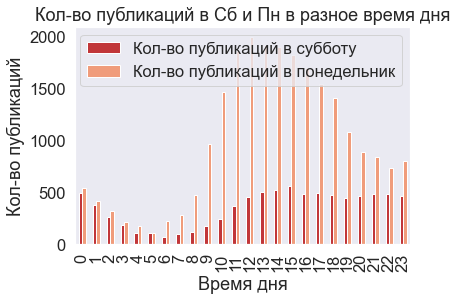

In [89]:
lst_sat = []
lst_mon = []
for k in [i for i in range(0,24)]:
    df = df.fillna(0)
    lst_sat.append(df.where(((df['hour'] == k) & (df['dayofweek'] == 6.0))).dropna().shape[0])
    lst_mon.append(df.where(((df['hour'] == k) & (df['dayofweek'] == 1.0))).dropna().shape[0])
df_11 = pd.DataFrame({"Кол-во публикаций в субботу" : lst_sat,
         "Кол-во публикаций в понедельник" : lst_mon,
        'Время дня' : [i for i in range(0,24)]})
df_11.groupby('Время дня').sum().plot(kind='bar',rot=90, title = 'Кол-во публикаций в Сб и Пн в разное время дня');
plt.ylabel('Кол-во публикаций');

По субботам авторы пишут в основном днём и вечером, а по понедельникам — в основном днем